## Результаты обучения сетей

In [37]:
import matplotlib.pyplot as plt
import numpy as np

### 1. Функция потерь на случайном split-е графа

In [38]:
loss_file_names = [
    '/content/drive/MyDrive/losses_unconnected_1.txt',
    '/content/drive/MyDrive/losses_unconnected_2.txt',
    '/content/drive/MyDrive/losses_unconnected_3.txt',
    '/content/drive/MyDrive/losses_unconnected_4.txt'
]

metrics_file_names = [
    '/content/drive/MyDrive/metrics_unconnected_1.txt',
    '/content/drive/MyDrive/metrics_unconnected_2.txt',
    '/content/drive/MyDrive/metrics_unconnected_3.txt',
    '/content/drive/MyDrive/metrics_unconnected_4.txt'   
]

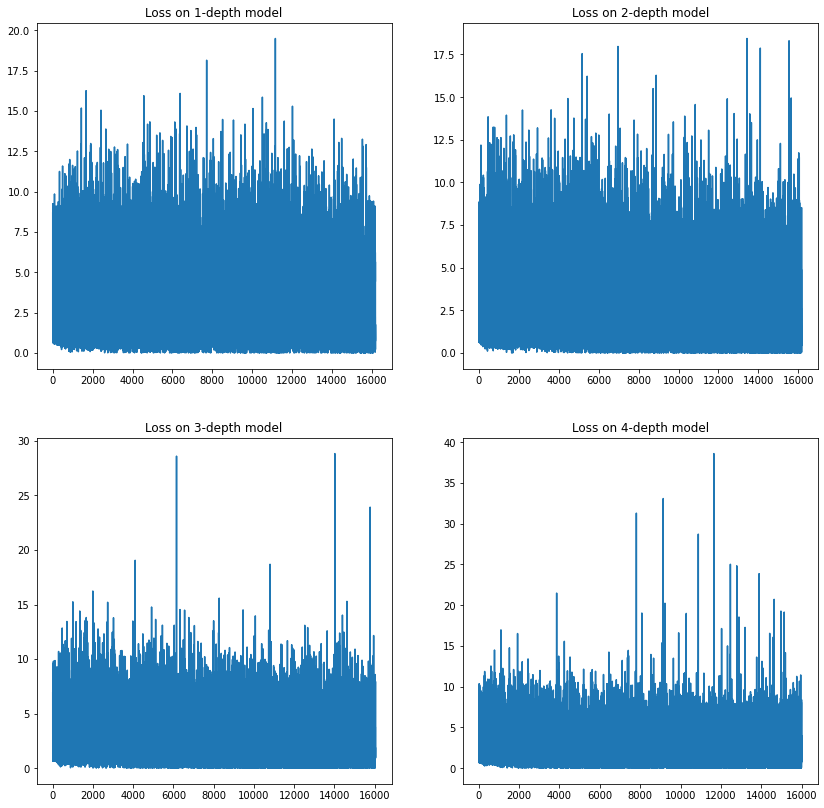

In [39]:
import pickle

fig, axs = plt.subplots(2, 2, figsize=(14, 14))
for i in range(4):
    with open(loss_file_names[i], 'rb') as f:
        losses = pickle.load(f)
    axs[i // 2, i % 2].plot(np.arange(len(losses)), losses)
    axs[i // 2, i % 2].set_title(f"Loss on {i+1}-depth model")
plt.show()

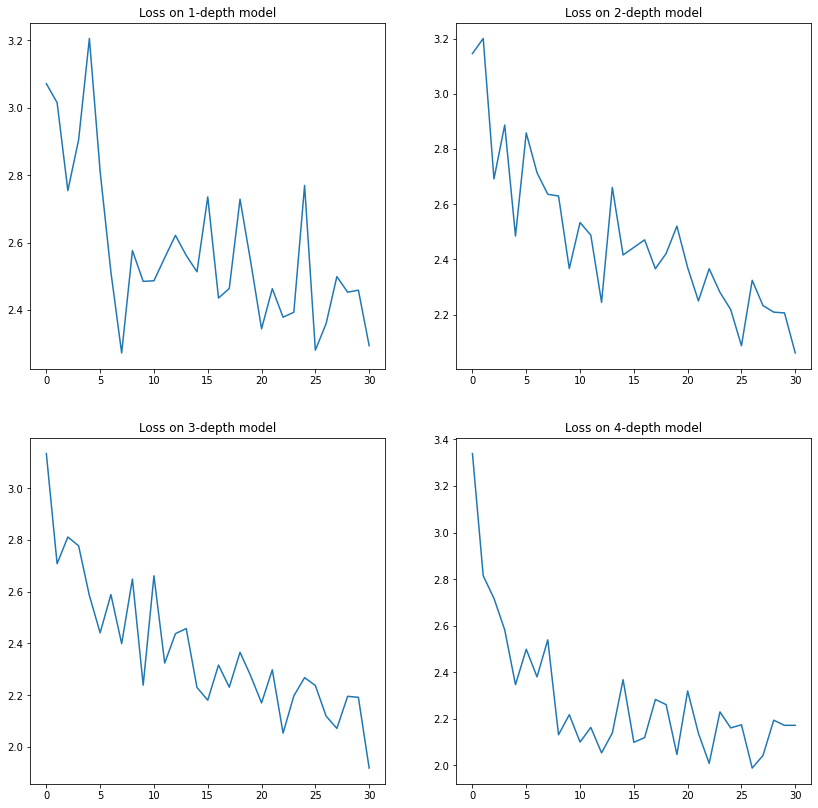

In [40]:
def mean_window(arr, window_size):
    answers = []
    for i in range(len(arr) // window_size - 1):
        start_ind = i * window_size
        end_ind = start_ind + window_size
        answers.append(sum(arr[start_ind:end_ind]) / window_size)
    return answers


fig, axs = plt.subplots(2, 2, figsize=(14, 14))
for i in range(4):
    with open(loss_file_names[i], 'rb') as f:
        losses = pickle.load(f)

    losses = mean_window(losses, 500)
    axs[i // 2, i % 2].plot(np.arange(len(losses)), losses)
    axs[i // 2, i % 2].set_title(f"Loss on {i+1}-depth model")
plt.show()

### 2. Метрики на случайном сплите графа

In [41]:
page_rank_metric_1 = 8.3963237109594e-05
page_rank_metric_2 = 0.00033414046568237967
page_rank_metric_3 = 6.144369510326461e-05


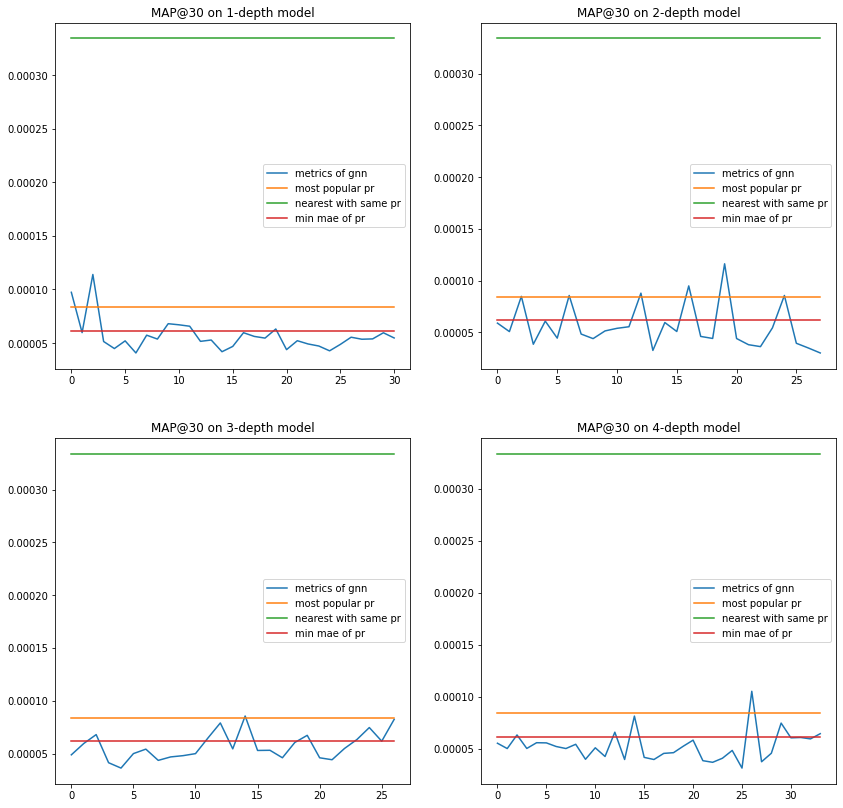

In [42]:
import pickle

fig, axs = plt.subplots(2, 2, figsize=(14, 14))
for i in range(4):
    with open(metrics_file_names[i], 'rb') as f:
        metrics = pickle.load(f)
    axs[i // 2, i % 2].plot(np.arange(len(metrics)), metrics, label="metrics of gnn")
    axs[i // 2, i % 2].plot(np.arange(len(metrics)), [page_rank_metric_1 for _ in range(len(metrics))], label="most popular pr")
    axs[i // 2, i % 2].plot(np.arange(len(metrics)), [page_rank_metric_2 for _ in range(len(metrics))], label="nearest with same pr")
    axs[i // 2, i % 2].plot(np.arange(len(metrics)), [page_rank_metric_3 for _ in range(len(metrics))], label="min mae of pr")
    axs[i // 2, i % 2].legend()
    axs[i // 2, i % 2].set_title(f"MAP@30 on {i+1}-depth model")
plt.show()

### 3. Лоссы на связном сплите графа

In [43]:
loss_file_names = [
    '/content/drive/MyDrive/losses_connected_1.txt',
    '/content/drive/MyDrive/losses_connected_2.txt',
]

metrics_file_names = [
    '/content/drive/MyDrive/metrics_connected_1.txt',
    '/content/drive/MyDrive/metrics_connected_2.txt',
]

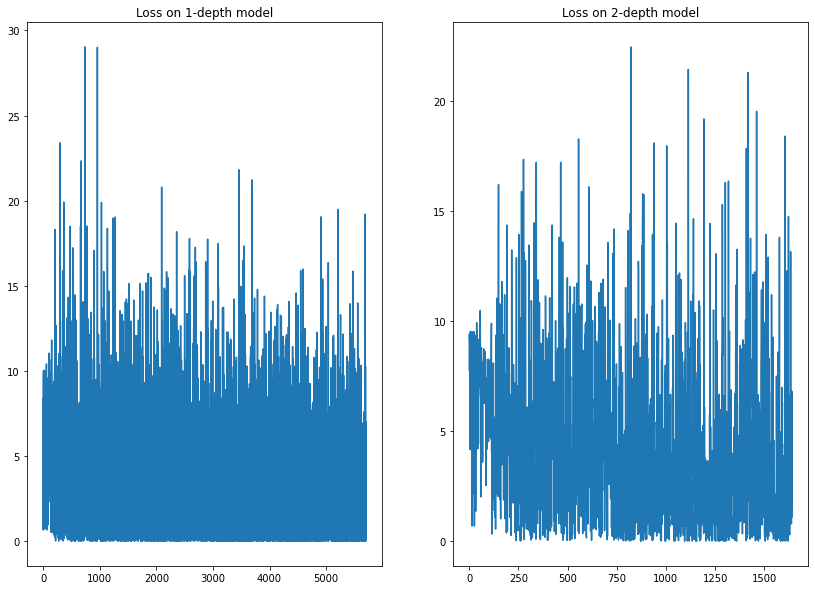

In [44]:
import pickle

fig, axs = plt.subplots(1, 2, figsize=(14, 10))
for i in range(2):
    with open(loss_file_names[i], 'rb') as f:
        losses = pickle.load(f)
    axs[i].plot(np.arange(len(losses)), losses)
    axs[i].set_title(f"Loss on {i+1}-depth model")
plt.show()

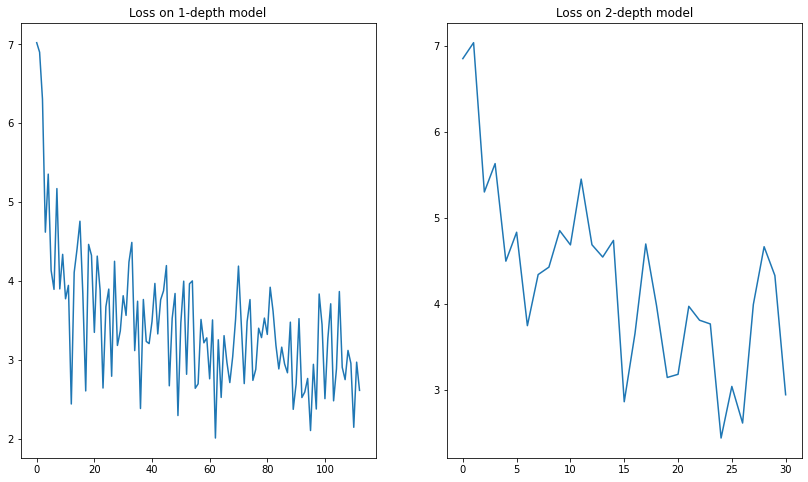

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8))
for i in range(2):
    with open(loss_file_names[i], 'rb') as f:
        losses = pickle.load(f)

    losses = mean_window(losses, 50)
    axs[i].plot(np.arange(len(losses)), losses)
    axs[i].set_title(f"Loss on {i+1}-depth model")
plt.show()

### 4. Метрики на связном сплите графа

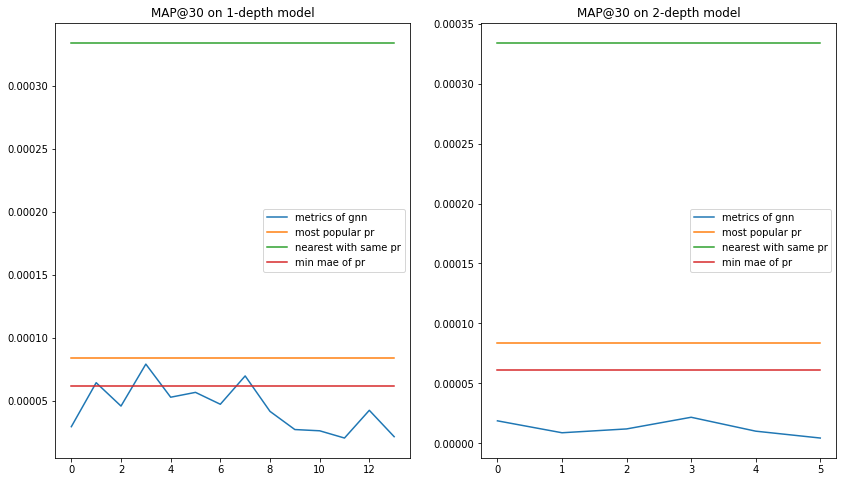

In [46]:
import pickle

fig, axs = plt.subplots(1, 2, figsize=(14, 8))
for i in range(2):
    with open(metrics_file_names[i], 'rb') as f:
        metrics = pickle.load(f)
    axs[i].plot(np.arange(len(metrics)), metrics, label="metrics of gnn")
    axs[i].plot(np.arange(len(metrics)), [page_rank_metric_1 for _ in range(len(metrics))], label="most popular pr")
    axs[i].plot(np.arange(len(metrics)), [page_rank_metric_2 for _ in range(len(metrics))], label="nearest with same pr")
    axs[i].plot(np.arange(len(metrics)), [page_rank_metric_3 for _ in range(len(metrics))], label="min mae of pr")
    axs[i].legend()
    axs[i].set_title(f"MAP@30 on {i+1}-depth model")
plt.show()